# Visualize pathway ranking

This notebook will visualize pathway ranking obtained by the different enrichment analysis methods.

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

import os
import pandas as pd
import numpy as np
import plotnine as pn

from ponyo import utils

np.random.seed(123)

In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)

In [3]:
# Load params
dataset_name = params["dataset_name"]
project_id = params["project_id"]

In [4]:
# Create dictionary of enrichment method: statistic
method_stats_dict = {
    "GSEA": "padj",
    "GSVA": "ES",
    "ROAST": "FDR",
    "CAMERA": "FDR",
    "ORA": "p.adjust"
}

## Get pathway summary data

In [5]:
# Pathway summary files
gsea_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}.tsv"
)
gsva_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_GSVA.tsv"
)
roast_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_ROAST.tsv"
)
camera_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_CAMERA.tsv"
)
ora_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_ORA.tsv"
)

In [6]:
# Pathway summary data
gsea_pathway_summary = pd.read_csv(gsea_pathway_summary_filename, sep="\t", index_col=0, header=0)
gsva_pathway_summary = pd.read_csv(gsva_pathway_summary_filename, sep="\t", index_col=0, header=0)
roast_pathway_summary = pd.read_csv(roast_pathway_summary_filename, sep="\t", index_col=0, header=0)
camera_pathway_summary = pd.read_csv(camera_pathway_summary_filename, sep="\t", index_col=0, header=0)
ora_pathway_summary = pd.read_csv(ora_pathway_summary_filename, sep="\t", index_col=0, header=0)

## Format data for plotting

In [7]:
gsea_pathway_summary.head()

,Pathway ID,Adj P-value (Real),Rank (Real),padj (Real),Median adj p-value (simulated),Rank (simulated),Mean padj (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,
HALLMARK_GLYCOLYSIS,HALLMARK_GLYCOLYSIS,0.002069,49.0,0.002069,0.810846,24.0,0.599480,0.443281,22,-1.347705
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,0.002069,49.0,0.002069,1.000000,5.0,0.682664,0.428996,19,-1.586481
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,0.002069,49.0,0.002069,1.000000,5.0,0.647738,0.440403,17,-1.466087
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,0.002268,43.0,0.002268,0.314102,40.0,0.438064,0.433699,25,-1.004836
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,0.002268,43.0,0.002268,0.014170,48.0,0.202629,0.368128,25,-0.544269


In [8]:
gsva_pathway_summary.head()

,Pathway ID,Rank (Real),abs(ES) (Real),ES (Real),Rank (simulated),Mean abs(ES) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,50.0,0.209187,-0.209187,50.0,0.344466,0.073104,2,-1.850503
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,49.0,0.132144,0.132144,10.0,0.038995,0.008183,2,11.383110
HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,48.0,0.128857,-0.128857,23.0,0.072673,0.017091,2,3.287407
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,47.0,0.128787,-0.128787,37.0,0.134995,0.117157,2,-0.052989
HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,46.0,0.124543,-0.124543,44.0,0.215213,0.214793,2,-0.422126


In [9]:
roast_pathway_summary.head()

,Pathway ID,Adj P-value (Real),Rank (Real),FDR (Real),Median adj p-value (simulated),Rank (simulated),Mean FDR (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,2,NaN
HALLMARK_KRAS_SIGNALING_DN,HALLMARK_KRAS_SIGNALING_DN,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,2,NaN
HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_UP,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,2,NaN
HALLMARK_MITOTIC_SPINDLE,HALLMARK_MITOTIC_SPINDLE,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,2,NaN
HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,0.0001,25.5,0.0001,0.0001,25.5,0.0001,0.0,2,NaN


In [10]:
camera_pathway_summary.head()

,Pathway ID,Adj P-value (Real),Rank (Real),FDR (Real),Median adj p-value (simulated),Rank (simulated),Mean FDR (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,2.580185e-07,50.0,2.580185e-07,4.355769e-08,50.0,4.355769e-08,6.152764e-08,2,3.485601
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,2.629681e-05,49.0,2.629681e-05,3.271357e-07,49.0,3.271357e-07,4.624540e-07,2,56.156224
HALLMARK_ANDROGEN_RESPONSE,HALLMARK_ANDROGEN_RESPONSE,1.082655e-04,48.0,1.082655e-04,2.136683e-06,48.0,2.136683e-06,3.020606e-06,2,35.134934
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,1.543327e-04,47.0,1.543327e-04,1.079054e-05,47.0,1.079054e-05,1.525289e-05,2,9.410815
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,4.179875e-04,46.0,4.179875e-04,1.291816e-05,46.0,1.291816e-05,1.823989e-05,2,22.207881


In [11]:
ora_pathway_summary.head()

,Pathway ID,Adj P-value (Real),Rank (Real),p.adjust (Real),Median adj p-value (simulated),Rank (simulated),Mean p.adjust (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,
HALLMARK_KRAS_SIGNALING_DN,HALLMARK_KRAS_SIGNALING_DN,0.000012,11.0,0.000012,2.118024e-05,4.0,2.118024e-05,NaN,1,NaN
HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,0.000013,9.5,0.000013,1.739689e-18,6.0,1.739689e-18,NaN,1,NaN
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.000014,8.0,0.000014,1.243188e-02,2.0,1.243188e-02,NaN,1,NaN
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,0.000060,7.0,0.000060,2.931928e-02,1.0,2.931928e-02,NaN,1,NaN


## Plot

In [12]:
# define plotting function
def plot_significance_vs_ranking(summary_df, method_name, x_label, output_figure_filename):
    # Format input dataframe
    plot_df = pd.DataFrame(
        data={"Test statistic": summary_df[method_stats_dict[method_name]+" (Real)"].values,
          "Percentile rank": summary_df["Rank (simulated)"].rank(pct=True).values
         },
        index=summary_df.index
    )
    
    fig = pn.ggplot(plot_df, pn.aes(x='Test statistic', y='Percentile rank'))
    fig += pn.geom_point()
    fig += pn.geom_text(pn.aes(label=
                               [x if plot_df.loc[x,'Percentile rank']>0.9 else "" for x in plot_df.index]),
                        ha='right',
                        va='top'
                       )
    fig += pn.labs(x = x_label,
                y = 'Percentile of ranking',
                title = f'{method_name} pathway statistics vs ranking')
    fig += pn.theme_bw()
    fig += pn.theme(
        legend_title_align = "center",
        plot_background=pn.element_rect(fill='white'),
        legend_key=pn.element_rect(fill='white', colour='white'), 
        legend_title=pn.element_text(family='sans-serif', size=15),
        legend_text=pn.element_text(family='sans-serif', size=12),
        plot_title=pn.element_text(family='sans-serif', size=15),
        axis_text=pn.element_text(family='sans-serif', size=12),
        axis_title=pn.element_text(family='sans-serif', size=15)
        )

    print(fig)
    
    # Save figure
    fig.save(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )

In [13]:
"""plot_df = pd.DataFrame(
    data={"Test statistic": gsea_pathway_summary[method_stats_dict["GSEA"]+" (Real)"].values,
          "Percentile rank": gsea_pathway_summary["Rank (simulated)"].rank(pct=True).values
         }
    )
[x if plot_df.loc[x,'Percentile rank']>0.8 else "" for x in list(plot_df.index)]"""

'plot_df = pd.DataFrame(\n    data={"Test statistic": gsea_pathway_summary[method_stats_dict["GSEA"]+" (Real)"].values,\n          "Percentile rank": gsea_pathway_summary["Rank (simulated)"].rank(pct=True).values\n         }\n    )\n[x if plot_df.loc[x,\'Percentile rank\']>0.8 else "" for x in list(plot_df.index)]'

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


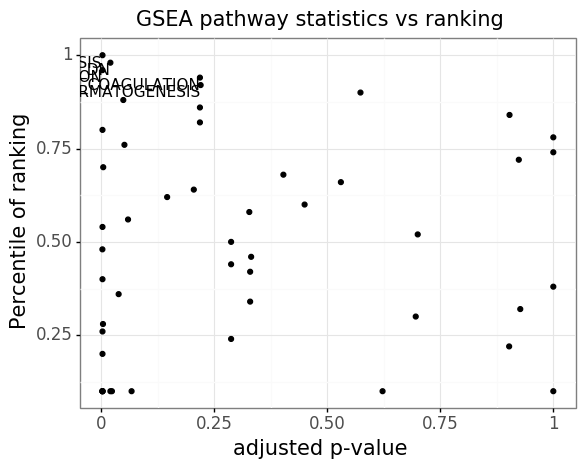

<ggplot: (8751552776445)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSEA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [14]:
plot_significance_vs_ranking(gsea_pathway_summary, "GSEA", "adjusted p-value", "GSEA_pathway_ranking.svg")

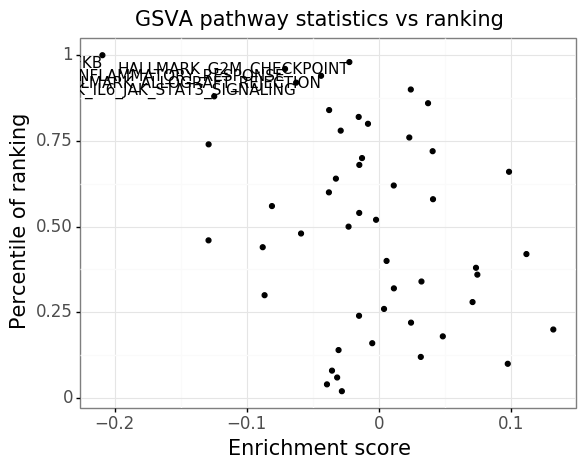

<ggplot: (8751552776357)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSVA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [15]:
plot_significance_vs_ranking(gsva_pathway_summary, "GSVA", "Enrichment score", "GSVA_pathway_ranking.svg")

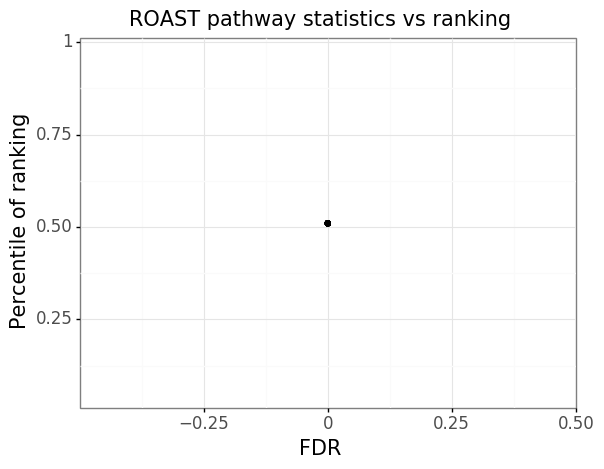

<ggplot: (8751550505609)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ROAST_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [16]:
plot_significance_vs_ranking(roast_pathway_summary, "ROAST", "FDR", "ROAST_pathway_ranking.svg")

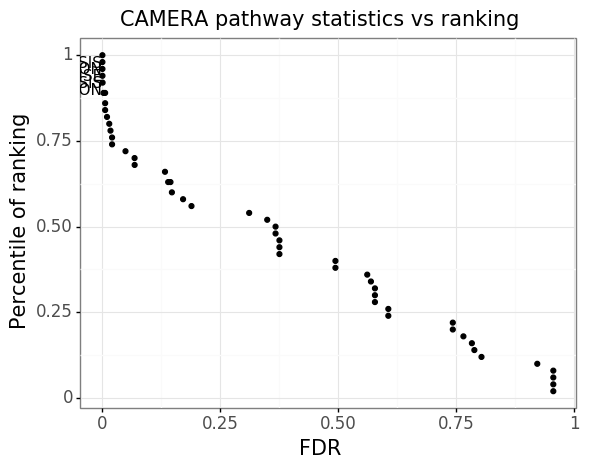

<ggplot: (8751552778885)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: CAMERA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [17]:
plot_significance_vs_ranking(camera_pathway_summary, "CAMERA", "FDR", "CAMERA_pathway_ranking.svg")

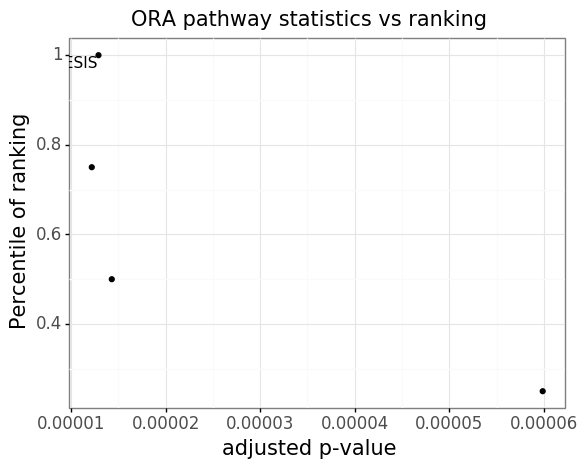

<ggplot: (8751552778885)>


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ORA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


In [18]:
plot_significance_vs_ranking(ora_pathway_summary, "ORA", "adjusted p-value", "ORA_pathway_ranking.svg")